# Proyek Analisis Data: E-commerce-Public-Dataset
- **Nama:** Restu Khoirunnisa
- **Email:**  m002b4kx3758@bangkit.academy
- **ID Dicoding:** restunisa

## Menentukan Pertanyaan Bisnis



- Bagaimana pengaruh season terhadap jumlah penyewaan sepeda?
- Bagaimana tren penyewaan sepeda berdasarkan waktu dalam satu hari selama dua tahun?

## Import Semua Packages/Library yang Digunakan

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [14]:
#Upload data file dari komputer ke google colab
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


In [16]:
#Membaca dan menampilkan 5 baris pertama dari dataFrame day
day_df = pd.read_csv("day.csv")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
#Membaca dan menampilkan 5 baris pertama dari dataframe hour
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset hour dan day memiliki kolom yang hampir sama yaitu hour_df dengan 17 kolom, sedangkan day_df dengan 16 kolom. Perbedaan itu hanya disebabkan oleh bertambahnya kolom hour di hour_df. Kolom ini menunjukkan informasi lebih detail terkait jam, sementara day_df hanya mengagregasi data per hari, tanpa menyertakan detail jam
- Kedua dataset mengandung atribut yang menggambarkan kondisi lingkungan, seperti musim, hari libur, dan cuaca, serta kondisi fisik, seperti suhu, kelembaban, dan kecepatan angin. Faktor-faktor ini mempengaruhi jumlah penyewaan sepeda dan menunjukkan pengaruh kondisi eksternal terhadap penggunaan layanan bike-sharing.

### Assessing Data

In [18]:
#Memeriksa tipe data dari tiap colom yang terdapat pada data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
#Dari info data diatas dapat disimpulkan bahwa tidak ada data yang hilang
# dikarenakan jumlah setiap barisnya sama.
# Sehingga untuk memastikannya, dapat kita analisis data yang hilang sebagai berikut.
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
#Memeriksa duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
#Menampilkan parameter statistik untuk memudahkan pemeriksaan
day_df.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [ ]:
#Memeriksa tipe data dari tiap colom yang terdapat pada data day_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
#Dapat disimpulkan tidak ada data yang hilang
#Sehingga, dapat langsung memeriksa duplikat data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
#Menampilkan parameter statistik
hour_df.describe(include = 'all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,16678.000000,16678,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8498.037774,NaN,2.486749,0.483211,6.507195,11.419055,0.029740,2.996163,0.679158,1.433625,0.491198,0.470684,0.631897,0.189325,32.294040,135.204281,167.498321
std,5007.141335,NaN,1.114228,0.499733,3.471059,6.981710,0.169874,2.011983,0.466814,0.644162,0.192469,0.171951,0.192443,0.122511,43.724154,120.534711,148.232031
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4179.250000,NaN,1.000000,0.000000,3.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,31.000000,37.000000
50%,8365.500000,NaN,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.640000,0.164200,15.000000,109.000000,133.000000
75%,12782.250000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.790000,0.253700,44.000000,204.000000,259.000000


**Insight:**
- Kedua dataset tidak memiliki data kosong maupun data duplikasi.
- Parameter statistik kedua data tersebut dapat dilihat pada tabel di atas

### Cleaning Data

In [19]:
#Mendeteksi dan membersihkan outlier menggunakan metode
#IQR (Interquartile Range)
#Pada day_df

Q1 = (day_df['cnt']).quantile(0.25)
Q3 = (day_df['cnt']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

upper_than = day_df['cnt'] > maximum
lower_than = day_df['cnt'] < minimum

day_df.drop(day_df[upper_than].index, inplace=True)
day_df.drop(day_df[lower_than].index, inplace=True)

In [20]:
#Mendeteksi dan membersihkan outlier menggunakan metode
#IQR (Interquartile Range)
#Pada hour_df

Q1 = (hour_df['cnt']).quantile(0.25)
Q3 = (hour_df['cnt']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

upper_than = hour_df['cnt'] > maximum
lower_than = hour_df['cnt'] < minimum

hour_df.drop(hour_df[upper_than].index, inplace=True)
hour_df.drop(hour_df[lower_than].index, inplace=True)


<ipython-input-20-15c0593fae05>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hour_df.drop(hour_df[lower_than].index, inplace=True)


In [21]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [22]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000
mean,8542.168899,2.490399,0.487733,6.513275,11.458101,0.029513,2.997748,0.678618,1.430663,0.492650,0.471970,0.630412,0.189619,33.418632,139.291514,172.710146
std,5007.766040,1.111966,0.499864,3.462438,6.962144,0.169244,2.013054,0.467021,0.642689,0.192455,0.171878,0.192600,0.122460,45.896591,126.052802,155.020918
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4219.250000,1.000000,0.000000,4.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,32.000000,38.000000
50%,8438.500000,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.179100,15.000000,111.000000,135.000000
75%,12832.750000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.790000,0.253700,45.000000,208.000000,265.750000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,354.000000,629.000000,642.000000


**Insight:**
- Dataset day_df tidak memiliki outlier sehingga dapat langsung digunakan tanpa dibersihkan terlebih dahulu
- Dataset hour_df memiliki outlier sehingga harus dilakukan cleaning data untuk menghilangkan outlier tersebut

## Exploratory Data Analysis (EDA)

In [23]:
#Menampilkan rata2 penyewaan sepeda berdasarkan season pada day_df
season_day = day_df.groupby(by='season').agg({"cnt" : "mean"}).reset_index()
print(season_day)

   season          cnt
0       1  2604.132597
1       2  4992.331522
2       3  5644.303191
3       4  4728.162921


In [24]:
#Menampilkan rata2 penyewaan sepeda berdasarkan season pada hour_df
season_hour = hour_df.groupby(by='season').agg({"cnt" : "mean"}).reset_index()
print(season_hour)

   season         cnt
0       1  108.410609
1       2  189.459440
2       3  211.527687
3       4  180.872195


### Explore day_df

In [25]:
tren_jam = hour_df.groupby(by='hr').agg({"cnt" : "mean"})
print(tren_jam)

           cnt
hr            
0    53.898072
1    33.375691
2    22.869930
3    11.727403
4     6.352941
5    19.889819
6    76.044138
7   212.064649
8   284.525000
9   219.309491
10  173.668501
11  206.910345
12  242.828411
13  239.559490
14  231.647059
15  243.256983
16  305.750696
17  372.551127
18  349.410684
19  304.474790
20  226.030220
21  172.314560
22  131.335165
23   87.831044


In [26]:
tren_jam_pertahun = hour_df.groupby(['yr', 'hr']).agg({"cnt": "mean"}).reset_index()
print(tren_jam_pertahun)

    yr  hr         cnt
0    0   0   43.047091
1    0   1   26.550000
2    0   2   18.923295
3    0   3   10.061404
4    0   4    5.391691
5    0   5   14.609065
6    0   6   57.620499
7    0   7  156.831956
8    0   8  262.994490
9    0   9  163.873278
10   0  10  130.884298
11   0  11  155.917355
12   0  12  190.104396
13   0  13  190.491758
14   0  14  181.352617
15   0  15  188.434066
16   0  16  234.580822
17   0  17  349.676712
18   0  18  322.272727
19   0  19  236.369146
20   0  20  173.052342
21   0  21  134.641873
22   0  22  103.793388
23   0  23   69.190083
24   1   0   64.630137
25   1   1   40.126374
26   1   2   26.696970
27   1   3   13.332394
28   1   4    7.252778
29   1   5   25.010989
30   1   6   94.315934
31   1   7  267.145604
32   1   8  317.502110
33   1   9  274.593407
34   1  10  216.335165
35   1  11  258.044199
36   1  12  298.135447
37   1  13  291.783626
38   1  14  283.660969
39   1  15  299.948864
40   1  16  379.339943
41   1  17  411.933962
42   1  18 

**Insight:**
- Dapat diketahui nilai rata-rata penyewaan sepeda terbesar berdasarkan musim tertinggi pada musim gugur sedangkan terendah pada musim semi
- Dapat diketahui nilai total penyewaan sepeda berdasarkan jam setiap harinya

## Visualization & Explanatory Analysis

### Bagaimana pengaruh season terhadap jumlah penyewaan sepeda?


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


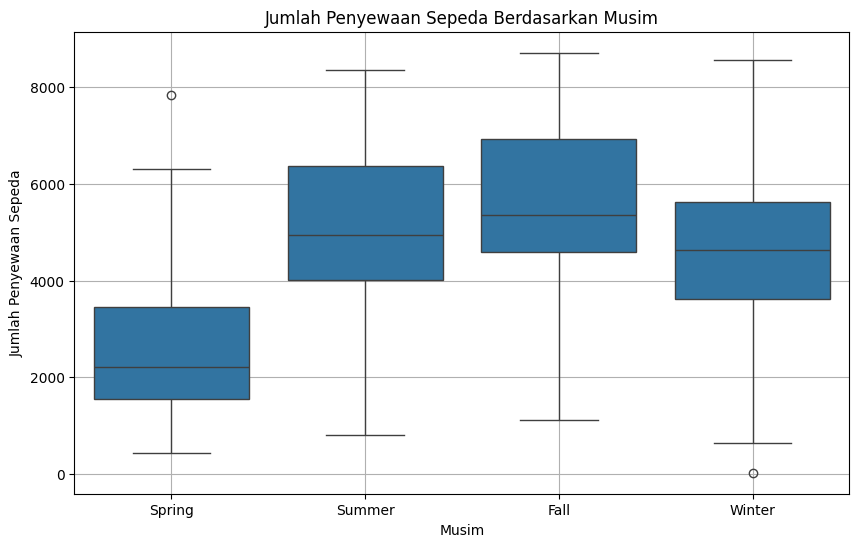

In [ ]:
# Melihat distribusi jumlah penyewaan sepeda berdasarakan musim menggunakan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.grid(True)
plt.show()

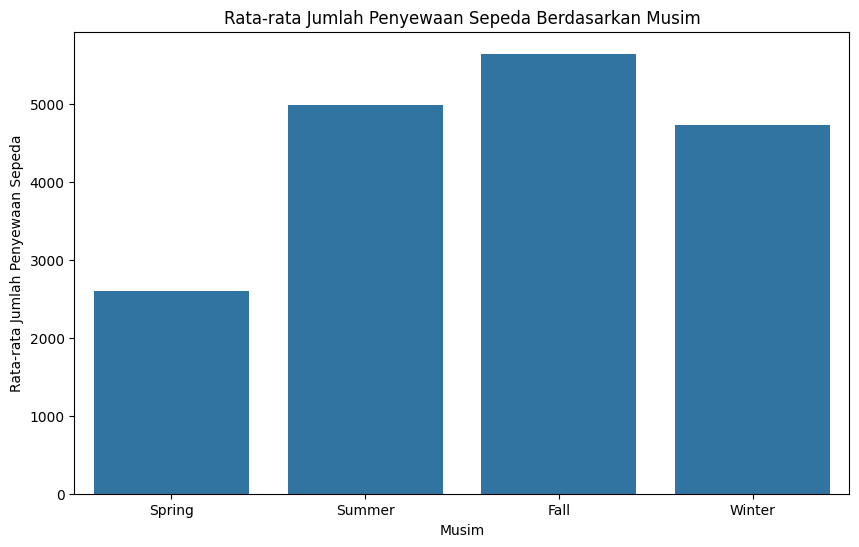

In [ ]:
# Menghitung rata-rata penyewaan berdasarkan musim
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=season_day)
plt.title('Rata-rata Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


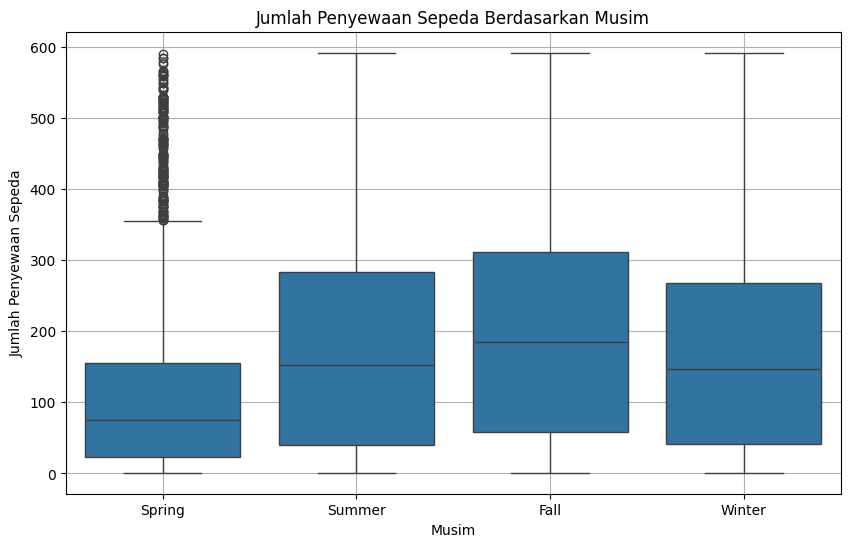

In [ ]:
# Melihat distribusi jumlah penyewaan sepeda berdasarakan musim menggunakan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=hour_df)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.grid(True)
plt.show()

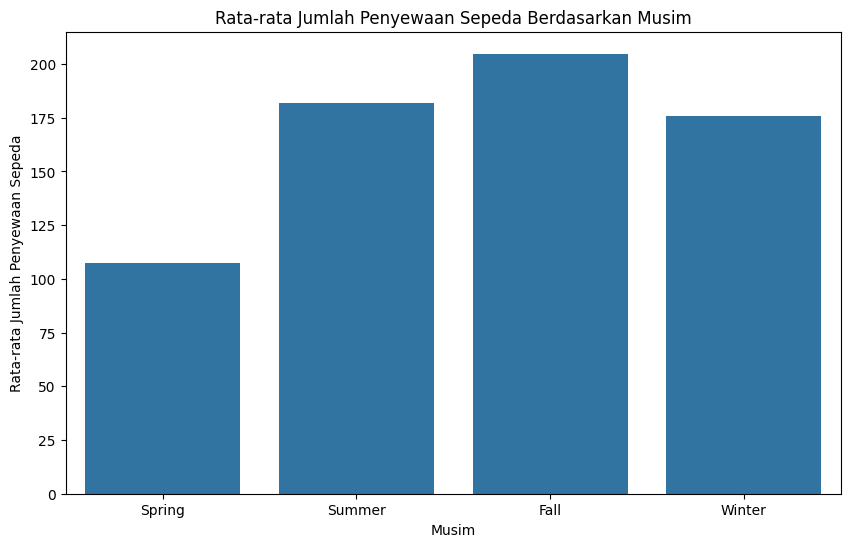

In [ ]:
# Menghitung rata-rata penyewaan berdasarkan musim
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=season_hour)
plt.title('Rata-rata Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

### Bagaimana tren penyewaan sepeda berdasarkan waktu dalam satu hari selama dua tahun?

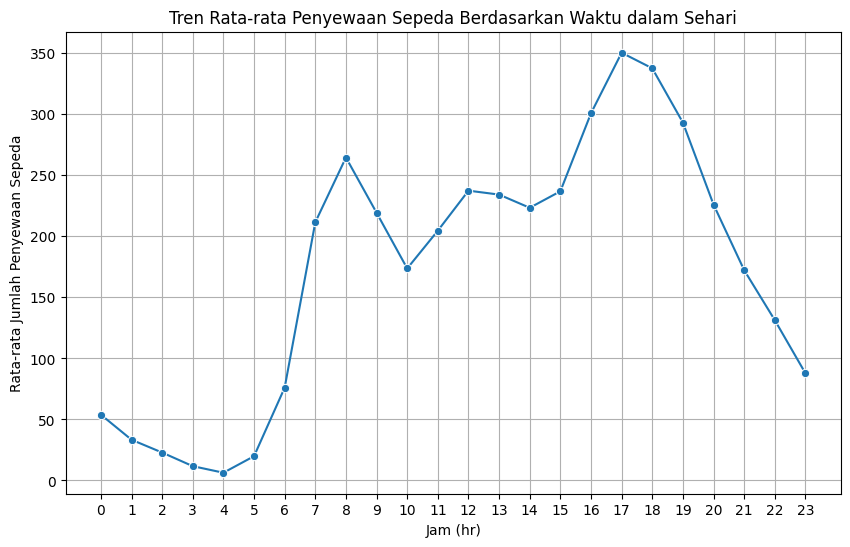

In [ ]:
#Menampilkan tren penyewaan berdasarkan jam
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=tren_jam, marker='o')
plt.title('Tren Rata-rata Penyewaan Sepeda Berdasarkan Waktu dalam Sehari')
plt.xlabel('Jam (hr)')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


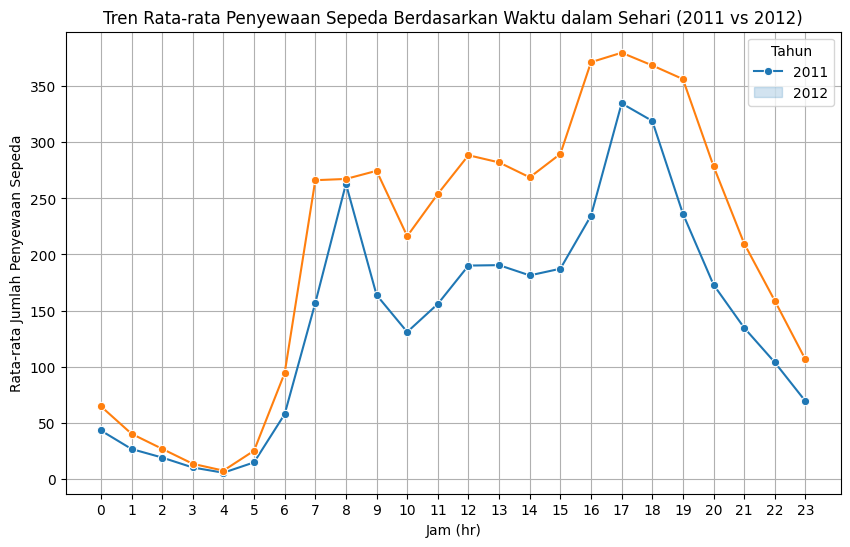

In [ ]:
#Melihat perbedaan tren antara tahun 2011 dan 2012
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', hue='yr', data=tren_jam_pertahun, marker='o')
plt.title('Tren Rata-rata Penyewaan Sepeda Berdasarkan Waktu dalam Sehari (2011 vs 2012)')
plt.xlabel('Jam (hr)')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(range(0, 24))
plt.legend(labels=['2011', '2012'], title='Tahun')
plt.grid(True)
plt.show()

**Insight:**
- Dengan menggunakan boxplot, kita dapat melihat bagaimana distribusi jumlah penyewaan sepeda berubah berdasarkan musim. Jumlah penyewaan akan lebih tinggi pada musim gugur (Fall) dan musing panas (Summer)
- Dengan visualisasi ini, kita bisa mendapatkan gambaran mengenai kapan penyewaan sepeda paling tinggi dalam satu hari, serta bagaimana tren tersebut berkembang dalam dua tahun (2011 dan 2012).

## Conclusion

- Berdasarkan boxplot dan barchart diatas, dapat diketahui Musim dengan penyewaan tertinggi adalah Summer dan Fall, dengan rata-rata dan median yang tinggi, menunjukkan banyaknya penyewaan selama cuaca nyaman. Spring memiliki jumlah penyewaan terendah, sedangkan Winter menunjukkan variabilitas besar tetapi tetap lebih rendah dibandingkan Summer dan Fall. Selain itu, terdapat beberapa outlier pada Spring dan Winter yang menunjukkan penyewaan yang tidak biasa pada hari-hari tertentu.
- Berdasarkan grafik rata-rata penyewaan sepeda dalam sehari, dapat diketahui tren rata-rata penyewaan sepeda dalam sehari menunjukkan dua puncak pada pukul 8 pagi dan 5-6 sore, yang kemungkinan mencerminkan aktivitas perjalanan yang tinggi. Sedangkan perbandingan tren penyewaan antara tahun 2011 dan 2012. Terlihat bahwa rata-rata penyewaan pada tahun 2012 lebih tinggi daripada 2011, terutama pada puncak jam sibuk pagi dan sore, menunjukkan peningkatan popularitas bike-sharing dari tahun ke tahun.

In [9]:
!pip install streamlit


  Using cached streamlit-1.39.0-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached GitPython-3.1.43-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached watchdog-5.0.3-py3-none-manylinux2014_x86_64.whl.metadata (41 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.1-py3-none-any.whl.metadata (4.3 kB)
Using cached streamlit-1.39.0-py2.py3-none-any.whl (8.7 MB)
Using cached GitPython-3.1.43-py3-none-any.whl (207 kB)
Using cached pydeck-0.9.1-py2.py3-none-any.whl (6.9 MB)
Using cached watchdog-5.0.3-py3-none-manylinux2014_x86_64.whl (79 kB)
Using cached gitdb-4.0.11-py3-none-any.whl (62 kB)
Using cached smmap-5.0.1-py3-none-any.whl (24 kB)


In [32]:
#Membuat Dashboard pada Streamlite

%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memastikan agar file dapat terbaca oleh Streamlit
uploaded_file = st.file_uploader("Upload day.csv", type=["csv"])
if uploaded_file:
    day_df = pd.read_csv(uploaded_file)

# Membaca dataset
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

# Membuat judul aplikasi
st.title("Bike Sharing Analysis Dashboard")

# Sidebar dengan filter (opsional)
st.sidebar.header("Filter")
selected_year = st.sidebar.selectbox("Pilih Tahun", [2011, 2012])

# Bagian 1: Analisis Musim
st.header("Analisis Musim")

# Boxplot untuk musim dan jumlah penyewaan
st.subheader("Distribusi Penyewaan Sepeda Berdasarkan Musim")
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_df, ax=ax)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.grid(True)
st.pyplot(fig)

# Bar plot untuk rata-rata penyewaan berdasarkan musim
st.subheader("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
season_day = day_df.groupby(by='season').agg({"cnt": "mean"}).reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=season_day, ax=ax)
plt.title('Rata-rata Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()
st.pyplot(fig)

# Bagian 2: Analisis Tren Harian
st.header("Analisis Tren Harian")

# Line plot untuk tren harian
st.subheader("Rata-rata Penyewaan Sepeda Berdasarkan Jam")
tren_jam = hour_df.groupby(by='hr').agg({"cnt": "mean"})
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=tren_jam, marker='o', ax=ax)
plt.title('Tren Rata-rata Penyewaan Sepeda Berdasarkan Waktu dalam Sehari')
plt.xlabel('Jam (hr)')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(range(0, 24))
plt.grid(True)
st.pyplot(fig)

# Line plot untuk tren harian dengan perbandingan tahun
st.subheader("Rata-rata Penyewaan Sepeda Berdasarkan Jam (2011 vs 2012)")
tren_jam_pertahun = hour_df.groupby(['yr', 'hr']).agg({"cnt": "mean"}).reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', hue='yr', data=tren_jam_pertahun, marker='o', ax=ax)
plt.title('Tren Rata-rata Penyewaan Sepeda Berdasarkan Waktu dalam Sehari (2011 vs 2012)')
plt.xlabel('Jam (hr)')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(range(0, 24))
plt.legend(labels=['2011', '2012'], title='Tahun')
plt.grid(True)
st.pyplot(fig)



Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.243.251.101:8501

your url is: https://loose-carpets-lick.loca.lt
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` 